In [2]:
# importing necesary libraries
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random

In [3]:
#giving a random seed to have the same data every time
np.random.seed(0)

In [4]:
# importing data into two sets one is test one is train and also importing labes
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [12]:
# assert good funcion fo debugging the code if condition is not bet gives an error 
# at this instance we are checking if training data has same numbers as label data
# doing the same to the test data
assert(X_train.shape[0] == y_train.shape[0]), "The number of images not equal to ne number of labels"
assert(X_test.shape[0] == y_test.shape[0]), "The number of images not equal to ne number of labels"
#asserting if images are required size 28x28px
assert(X_train.shape[1:] == (28,28)), "the dimension of the images ar not met"
assert(X_test.shape[1:] == (28,28)), "the dimension of the images ar not met"

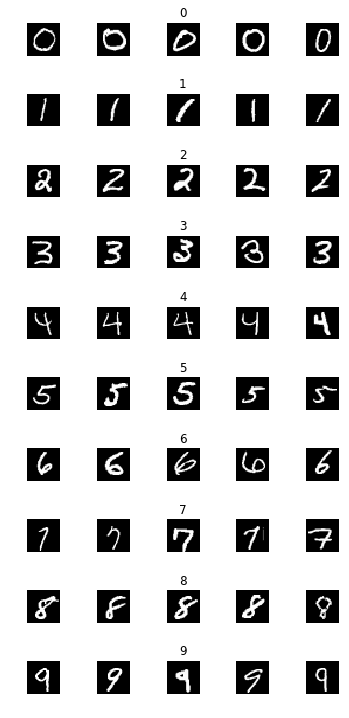

In [26]:
# ploting and analizing our data
num_of_samples = []
# we will create a grid arangement to check 5 samples of every label data in
# dataset ar plot the grid arrangement
# in this dataset we will have grid 5 column and 10 rows for avery number
columns = 5
num_classess = 10
fig, axs = plt.subplots(nrows=num_classess, ncols=columns, figsize=(5,10))
# tight_layout automatically adjusts subplot params 
# so that the subplot(s) fits in to the figure area
fig.tight_layout()
#looping through columns and inside looping through rows
for i in range(columns):
    for j in range(num_classess):
        # splitint our x_train data by assiocated label
        x_selected =  X_train[y_train == j]
        # representing images and turining them into gray color map
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected-1)), :, :], cmap=plt.get_cmap('gray'))
        # removing all info from plot and ading on the second column titles
        axs[j][i].axis('off')
        if i == 2:
            axs[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))

In [27]:
print(num_of_samples)
# printing the data distribution

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of images')

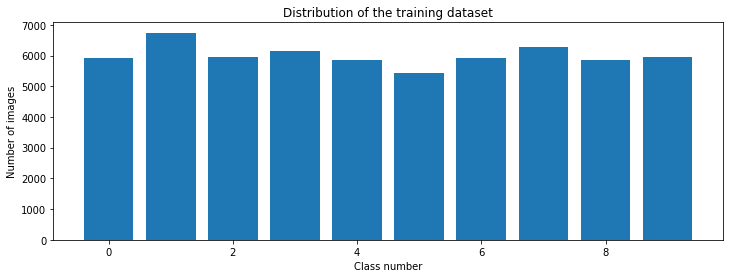

In [32]:
plt.figure(figsize=(12,4))
plt.bar(range(0, num_classess), num_of_samples)
plt.title('Distribution of the training dataset')
plt.xlabel('Class number')
plt.ylabel('Number of images')

In [33]:
# incoding data with one hot data encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [34]:
# normalizing the data making the images pixel values from 1 to 0 dividing value by 255
X_train = X_train/255
X_test = X_test/255

In [36]:
# flattening image to one row ar reshaping it
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)